# EMG Signal Processing Assignment

## Setup
    Import necessary libraries: numpy, scipy, matplotlib.

## Part 1: Signal Filtering

    Task: Implement a Butterworth filter to remove high-frequency noise from the EMG signal.
    Task: Compare the frequency response of the original and filtered signals using a frequency plot.

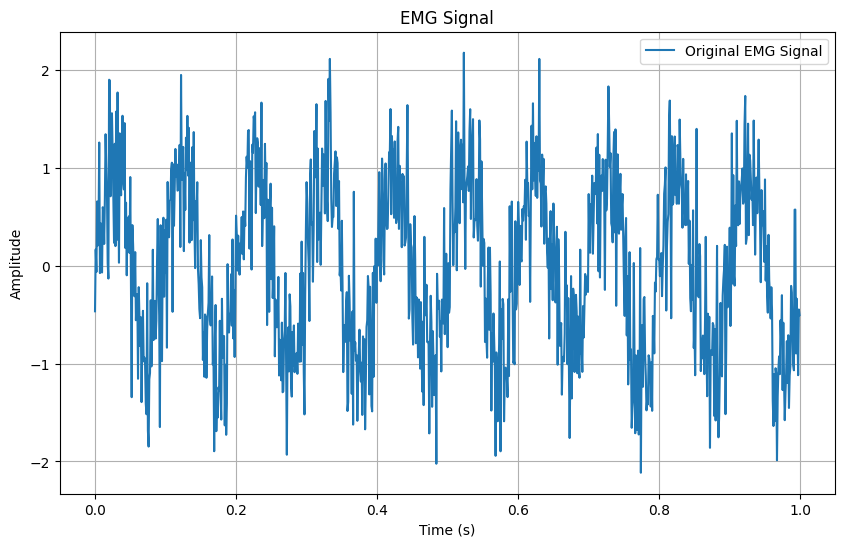

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy import signal, stats, optimize 

# Generate example EMG signal with noise
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector (1 second)
emg_signal = np.sin(2*np.pi*10*t) + 0.5*np.random.randn(len(t))

# Plot original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, emg_signal, label='Original EMG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EMG Signal')
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'band FILTERED EMG Signal')

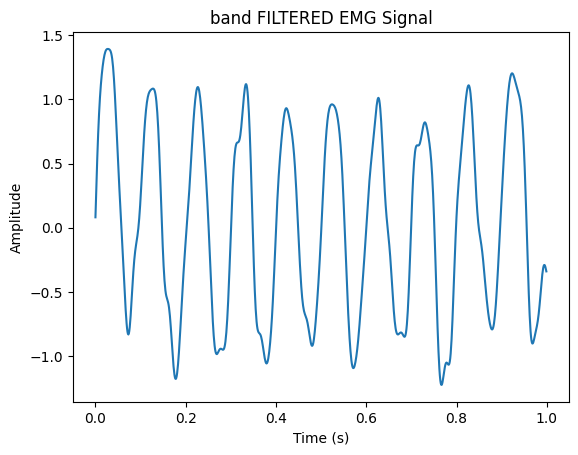

In [7]:
#Implement Butterworth filter or any other best suited filter.

l = 20.0  
h = 500.0 
order = 4
nyq = 6* fs
low = l / nyq
high = h / nyq
if high >= 1.0:
    high = 0.99

b, a = butter(order, [low, high], btype='band')
filtered = filtfilt(b, a, emg_signal)
plt.plot(t, filtered, label='band FILTERED EMG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('band FILTERED EMG Signal')


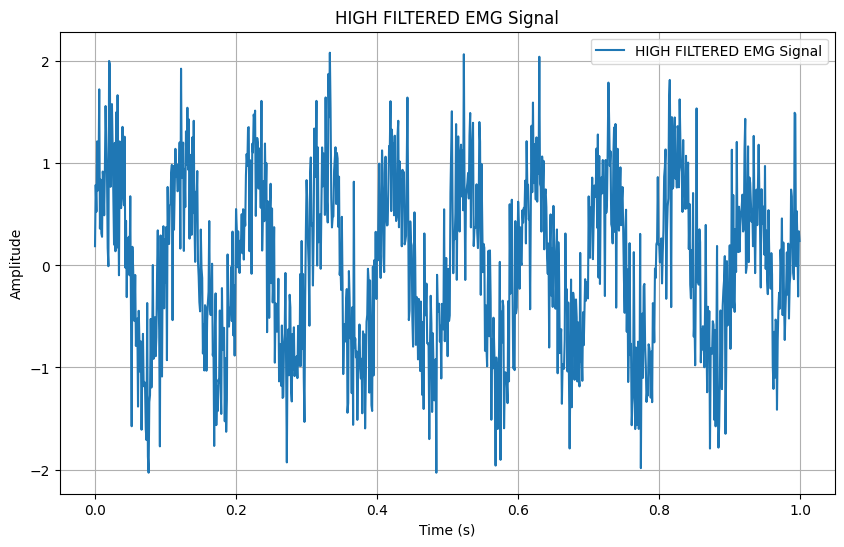

In [8]:
#implementing high pass filter
l1=200
q =15* fs


# Design Butterworth high-pass filter
b, a = butter(order, l1/q, btype='high')
plt.figure(figsize=(10, 6))
filtered = filtfilt(b, a, emg_signal)
plt.plot(t, filtered, label='HIGH FILTERED EMG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('HIGH FILTERED EMG Signal')



plt.legend()
plt.grid(True)
plt.show()

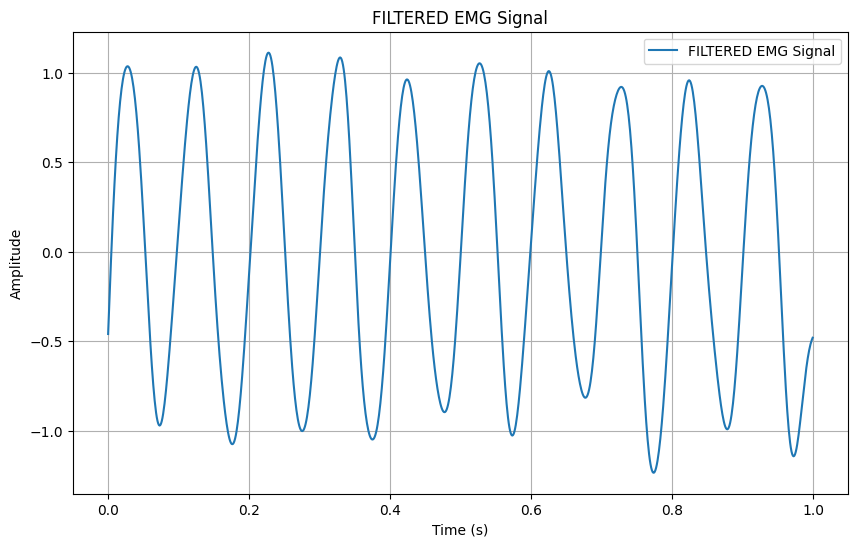

In [9]:
# implementing low pass filter
l1=50
q =  fs


# Design Butterworth low-pass filter
b, a = butter(order, l1/q, btype='low')
plt.figure(figsize=(10, 6))
filtered = filtfilt(b, a, emg_signal)
plt.plot(t, filtered, label='FILTERED EMG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('FILTERED EMG Signal')



plt.legend()
plt.grid(True)
plt.show()

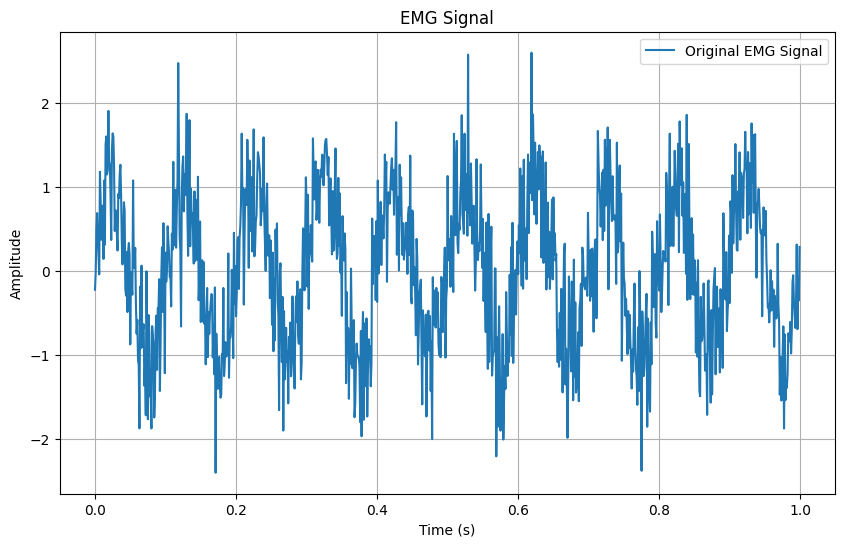

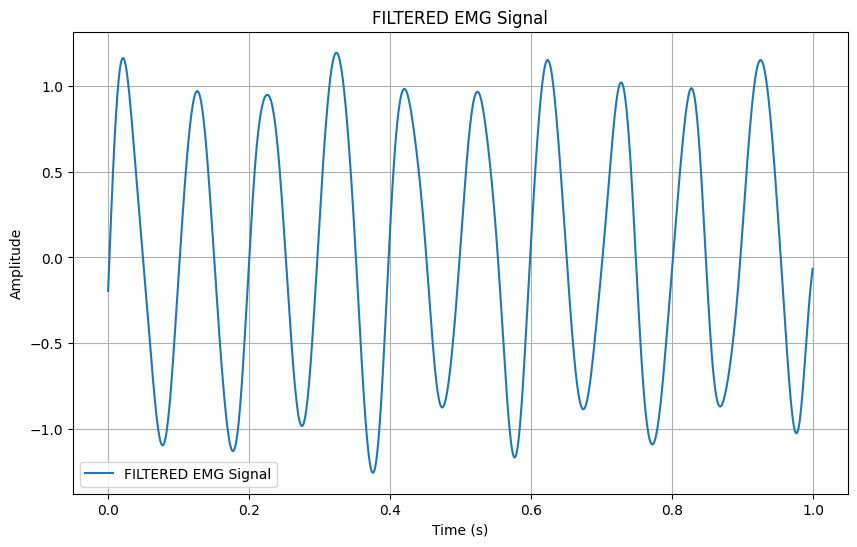

In [122]:
#Compare the frequency response of the original and filtered signals using a frequency plot.



plt.figure(figsize=(10, 6))
#fig, (filtered, emg_signal) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
plt.plot(t, emg_signal, label='Original EMG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EMG Signal')

plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, filtered, label='FILTERED EMG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('FILTERED EMG Signal')



plt.legend()
plt.grid(True)
plt.show()

## Part 2: Peak Detection

    Task: Utilize scipy.signal.find_peaks to detect peaks in the filtered EMG signal.
    Question: What parameters can be adjusted in find_peaks function to improve peak detection accuracy?
    Task: Plot the original signal with markers indicating the detected peaks.

Text(0.5, 1.0, 'FILTERED EMG Signal')

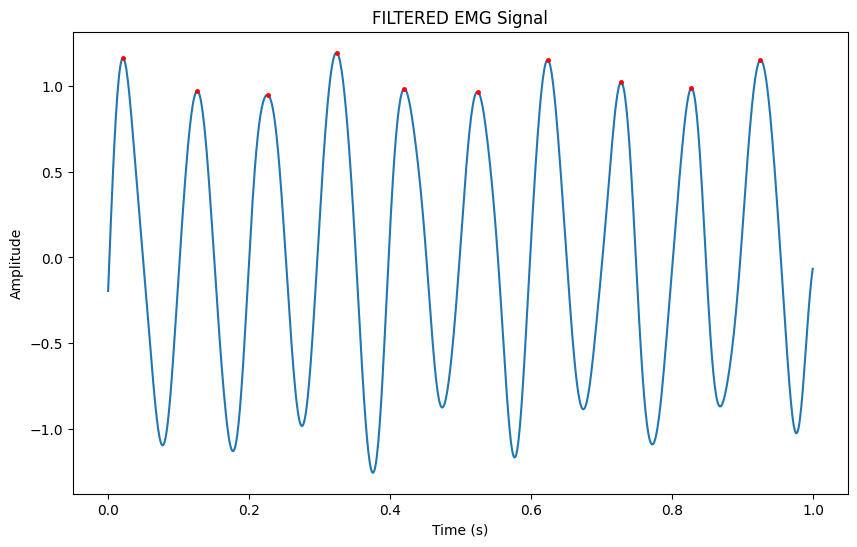

In [123]:
from scipy.signal import find_peaks
peak,_=find_peaks(filtered,height=0.5,distance=10)

plt.figure(figsize=(10, 6))
plt.plot(t, filtered, label='FILTERED EMG Signal')
plt.plot(t[peak], filtered[peak], 'r.', markersize=5, label='Peaks here')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('FILTERED EMG Signal')

Text(0.5, 1.0, 'FILTERED EMG Signal')

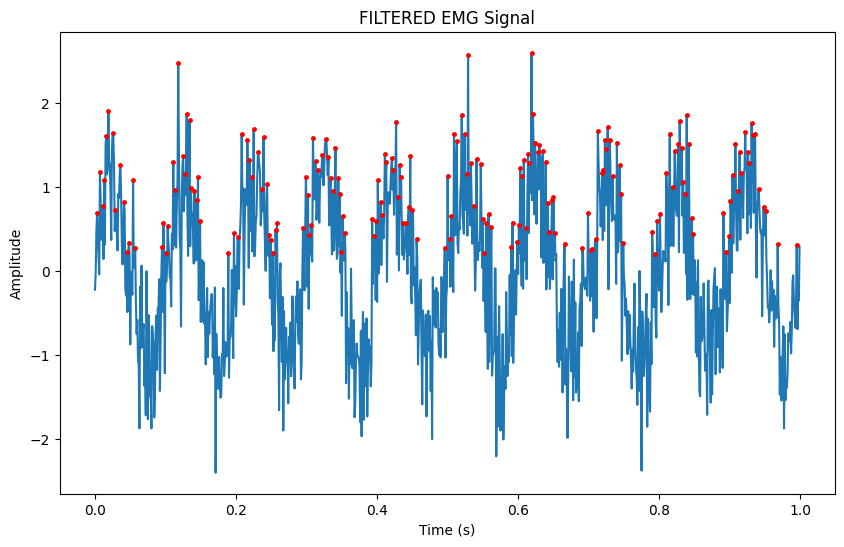

In [124]:
#answer of the question
#parameters like heigth =creating a minimum threshhold so that it detects even the smaller peaks .
#distance= peaks closer than this distance is considered a single peak and it also shall be less.
#plateau_size = which help analyse the correct shape for identifying the peaks
#prominence = height of the peak above the lowest contour line around the peak.useful for very high peaks.
from scipy.signal import find_peaks
peak,_=find_peaks(emg_signal,height=0.2,distance=2,prominence=0.2)


plt.figure(figsize=(10, 6))
plt.plot(t, emg_signal, label='EMG Signal')
plt.plot(t[peak], emg_signal[peak], 'r.', markersize=5, label='Peaks here')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('ORIGINAL EMG Signal')

## Part 3: Peak Start and End Time Detection

    Task: Develop a method to determine the start and end times of each detected peak.
    Question: Why is it necessary to identify the precise onset and offset times of muscle activation in EMG signals?
    Task: Visualize the original signal with annotated start and end times of peaks.

PEAK1 :START TIME=0.007000s, END TIME=0.008000s
PEAK2 :START TIME=0.019000s, END TIME=0.020000s
PEAK3 :START TIME=0.036000s, END TIME=0.037000s
PEAK4 :START TIME=0.054000s, END TIME=0.055000s
PEAK5 :START TIME=0.097000s, END TIME=0.098000s
PEAK6 :START TIME=0.118000s, END TIME=0.119000s
PEAK7 :START TIME=0.130000s, END TIME=0.131000s
PEAK8 :START TIME=0.146000s, END TIME=0.147000s
PEAK9 :START TIME=0.208000s, END TIME=0.209000s
PEAK10 :START TIME=0.225000s, END TIME=0.226000s
PEAK11 :START TIME=0.239000s, END TIME=0.240000s
PEAK12 :START TIME=0.258000s, END TIME=0.259000s
PEAK13 :START TIME=0.299000s, END TIME=0.300000s
PEAK14 :START TIME=0.309000s, END TIME=0.310000s
PEAK15 :START TIME=0.328000s, END TIME=0.329000s
PEAK16 :START TIME=0.341000s, END TIME=0.342000s
PEAK17 :START TIME=0.351000s, END TIME=0.352000s
PEAK18 :START TIME=0.401000s, END TIME=0.402000s
PEAK19 :START TIME=0.411000s, END TIME=0.412000s
PEAK20 :START TIME=0.427000s, END TIME=0.428000s
PEAK21 :START TIME=0.437000s,

<Figure size 1000x600 with 0 Axes>

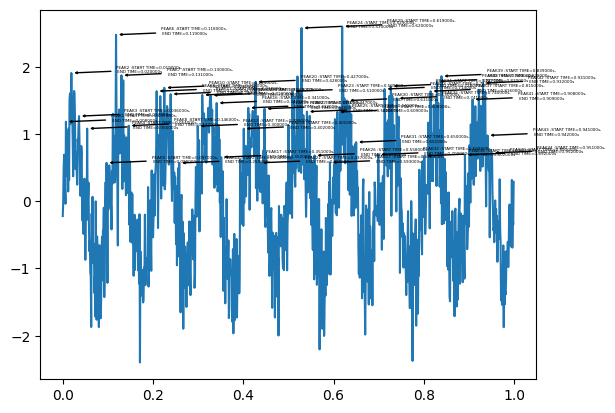

<Figure size 1000x600 with 0 Axes>

In [181]:
from scipy.signal import find_peaks
peak,_=find_peaks(emg_signal,height=0.5,distance=10)




peak_start=t[peak]
peak_end=t[peak+1] if len(peak)>0 and peak[-1]<len(t)-1 else t[peak]
for i in range(len(peak_start)):
    print(f"PEAK{i+1} :START TIME={peak_start[i]:2f}s, END TIME={peak_end[i]:2f}s")
    
    
for i in range (len(peak)):
    plt.annotate(f"PEAK{i+1} :START TIME={peak_start[i]:2f}s,\n END TIME={peak_end[i]:2f}s",
    xy=(t[peak[i]],emg_signal[peak[i]]),
    xytext=(t[peak[i]]+0.1,emg_signal[peak[i]]),
    arrowprops=dict(facecolor='black',arrowstyle='->'),
    fontsize=3)


plt.plot(t, emg_signal, label='EMG Signal')


plt.figure(figsize=(10, 6))



Answer the Question here:

In [140]:
#It helps in determing the duration of muscle activation , 
#so that sensors may sense it right.
#Its for the acurate measurement of the peaks to evaluate muscle function.
#muscle activation onset and offset times are used to trigger and control the movement of the device, and precise timing is essential for smooth and natural movement.

## Part 4: Envelope Extraction

    Task: Implement the Hilbert transform to extract the envelope of the filtered EMG signal.
    Question: What information does the envelope of an EMG signal provide about muscle activity?
    Task: Plot the original signal overlaid with its envelope.
    

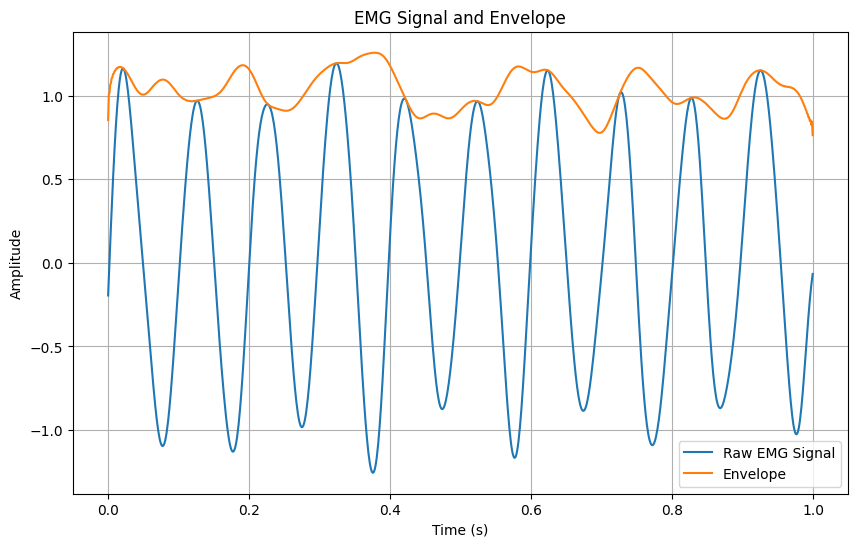

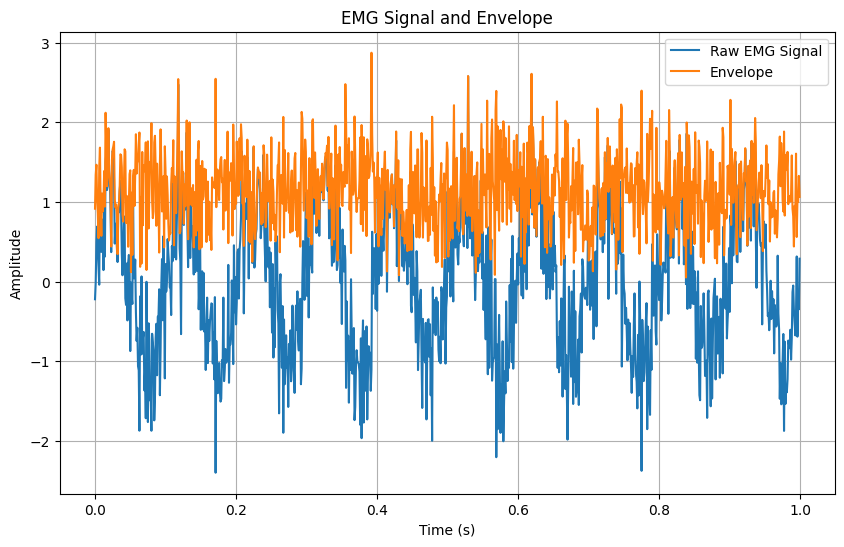

In [151]:
from scipy.signal import hilbert
hilbertfilt=hilbert(filtered)
envelope_hilbert=np.abs(hilbertfilt)
plt.figure(figsize=(10, 6))
plt.plot(t, filtered, label='Raw EMG Signal')
plt.plot(t, envelope_hilbert, label='Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EMG Signal and Envelope')
plt.legend()
plt.grid(True)
plt.show()


# original signal with its envelope
hilbertraw=hilbert(emg_signal)
envelope_hilbert1=np.abs(hilbertraw)
plt.figure(figsize=(10, 6))
plt.plot(t, emg_signal, label='Raw EMG Signal')
plt.plot(t, envelope_hilbert1, label='Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EMG Signal and Envelope')
plt.legend()
plt.grid(True)
plt.show()

Answer the Question here:
It represents the the magnitude of the signal over time , thus indicating the level of muscle contraction.It may help is assess muscle activation pattern .

## Part 5: Time Domain Analysis

    Task: Calculate key metrics such as mean, variance, and RMS (Root Mean Square) of the cleaned EMG signal.
    Task: Interpret the calculated metrics in the context of muscle activity and signal characteristics.

In [153]:
# Calculate key metrics.
#mean
mean_value=np.mean(filtered)
print('MEAN:',mean_value)

#variance
variance_value=np.var(filtered)
print('VARIANCE:',variance_value)

#RMS
rms_value=np.sqrt(np.mean(filtered**2))
print('RMS:',rms_value)



MEAN: 0.02879230056598923
VARIANCE: 0.5387443909943926
RMS: 0.7345565924871105


Interpretation:
- Mean: A higher mean value may suggest increased muscle activation, while a lower mean value may indicate reduced muscle activity.
- Variance: Higher variance may indicate greater variability in muscle activation, possibly due to changes in force production or signal noise.
- RMS: A higher RMS value corresponds to stronger muscle contractions, while a lower RMS value suggests weaker muscle activity.
These interpretations can provide insights into muscle performance, fatigue, and overall neuromuscular function.

## Part 6: Frequency Domain Analysis

    Task: Apply the Fast Fourier Transform (FFT) to analyze the frequency components of the cleaned EMG signal.
    Task: Plot the frequency spectrum of the EMG signal and identify prominent frequency peaks.

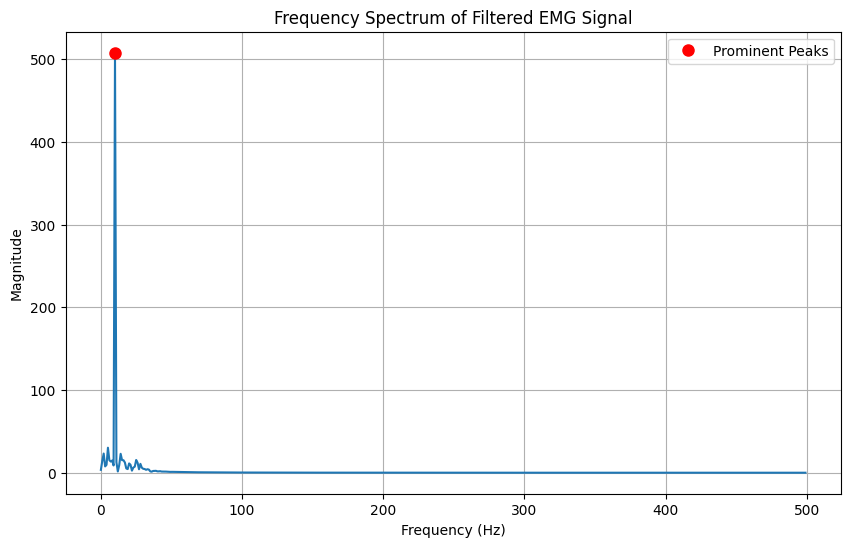

In [13]:
fft_applied=np.fft.fft(filtered)
w = np.fft.fftfreq(len(filtered), 1/fs)
plt.figure(figsize=(10, 6))
plt.plot(w[:len(filtered)//2], np.abs(fft_applied[:len(filtered)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of Filtered EMG Signal')
plt.grid(True)
peaks, _ = signal.find_peaks(np.abs(fft_applied[:len(filtered)//2]), height=40)  # Adjust height threshold as needed
plt.plot(w[peaks], np.abs(fft_applied[peaks]), 'ro', markersize=8, label='Prominent Peaks')

plt.legend()
plt.show()